In [1]:
import pandas as pd
import numpy as np
import pymc as pm
from src.data_utils import load_and_process_data
from src.model import run_full_analysis
import matplotlib.pyplot as plt

league = 'Premier_League'
season = '2021-2022'


# Simple one-liner to get everything ready
df, team_mapping, n_teams = load_and_process_data(
    db_path=r'C:\Users\Owner\dev\algobetting\infra\data\db\fotmob.db',
    league=league, 
    season=season,
    max_goals=9,
    decay_rate=0.002,
    goals_weight=0.2,
    xg_weight=0.5,
    psxg_weight=0.3

)

df

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


match_id  match_date  home_team  away_team  home_goals  away_goals  \
0       3609929  2021-08-13  Brentford    Arsenal           0           0   
1       3609929  2021-08-13  Brentford    Arsenal           0           1   
2       3609929  2021-08-13  Brentford    Arsenal           0           2   
3       3609929  2021-08-13  Brentford    Arsenal           0           3   
4       3609929  2021-08-13  Brentford    Arsenal           0           4   
...         ...         ...        ...        ...         ...         ...   
10608   3610309  2022-05-22    Norwich  Tottenham           2           8   
10609   3610309  2022-05-22    Norwich  Tottenham           3           2   
10610   3610309  2022-05-22    Norwich  Tottenham           3           3   
10611   3610309  2022-05-22    Norwich  Tottenham           3           4   
10612   3610309  2022-05-22    Norwich  Tottenham           3           5   

         weight  days_ago  is_actual  poisson_binomial_xg_prob  \
0      0.030809       281      False                  0.061463   
1      0.039431       281      False                  0.086842   
2      0.025233       281      False                  0.056614   
3      0.010765       281      False                  0.022722   
4      0.003444       281      False                  0.006314   
...         ...       ...        ...                       ...   
10608  0.001094         0      False                  0.000483   
10609  0.001072         0      False                  0.000856   
10610  0.001365         0      False                  0.001490   
10611  0.001305         0      False                  0.001589   
10612  0.000998         0      False                  0.001119   

       poisson_binomial_psxg_prob  poisson_xg_total_prob  home_idx  away_idx  
0                               0               0.081066         2         0  
1                               0               0.103754         2         0  
2                               0               0.066396         2         0  
3                               0               0.028326         2         0  
4                               0               0.009063         2         0  
...                           ...                    ...       ...       ...  
10608                           0               0.001641        14        16  
10609                           0               0.001607        14        16  
10610                           0               0.002048        14        16  
10611                           0               0.001957        14        16  
10612                           0               0.001496        14        16  

[10613 rows x 14 columns]

FOOTBALL MODEL ANALYSIS - PREMIER_LEAGUE 2021
Season: 2021
League: Premier_League
Teams: 20
Model version: vanilla_priors
Samples: 5000 (tune: 2500)

Building and sampling model...
  → Previous season priors disabled
  → Using default priors (no previous season data)


c:\Users\Owner\AppData\Local\Programs\Python\Python312\Lib\site-packages\pymc\data.py:274: FutureWarning: ConstantData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details



Analyzing results...
MODEL ANALYSIS RESULTS

1. PARAMETER SUMMARY STATISTICS
----------------------------------------
                 mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
att_str_raw[0]  0.219  0.257  -0.241    0.733      0.015    0.011     282.0   
att_str_raw[1] -0.080  0.265  -0.588    0.413      0.015    0.011     300.0   
att_str_raw[2] -0.066  0.268  -0.580    0.430      0.015    0.010     336.0   
att_str_raw[3] -0.124  0.268  -0.637    0.373      0.015    0.011     314.0   
att_str_raw[4] -0.250  0.273  -0.744    0.284      0.015    0.011     335.0   
...               ...    ...     ...      ...        ...      ...       ...   
def_str[15]     0.233  0.144  -0.040    0.510      0.002    0.001    8262.0   
def_str[16]    -0.178  0.174  -0.510    0.141      0.002    0.002    5735.0   
def_str[17]     0.327  0.134   0.064    0.569      0.001    0.001    8893.0   
def_str[18]     0.049  0.157  -0.243    0.347      0.002    0.002    6653.0   
def_str[19] 

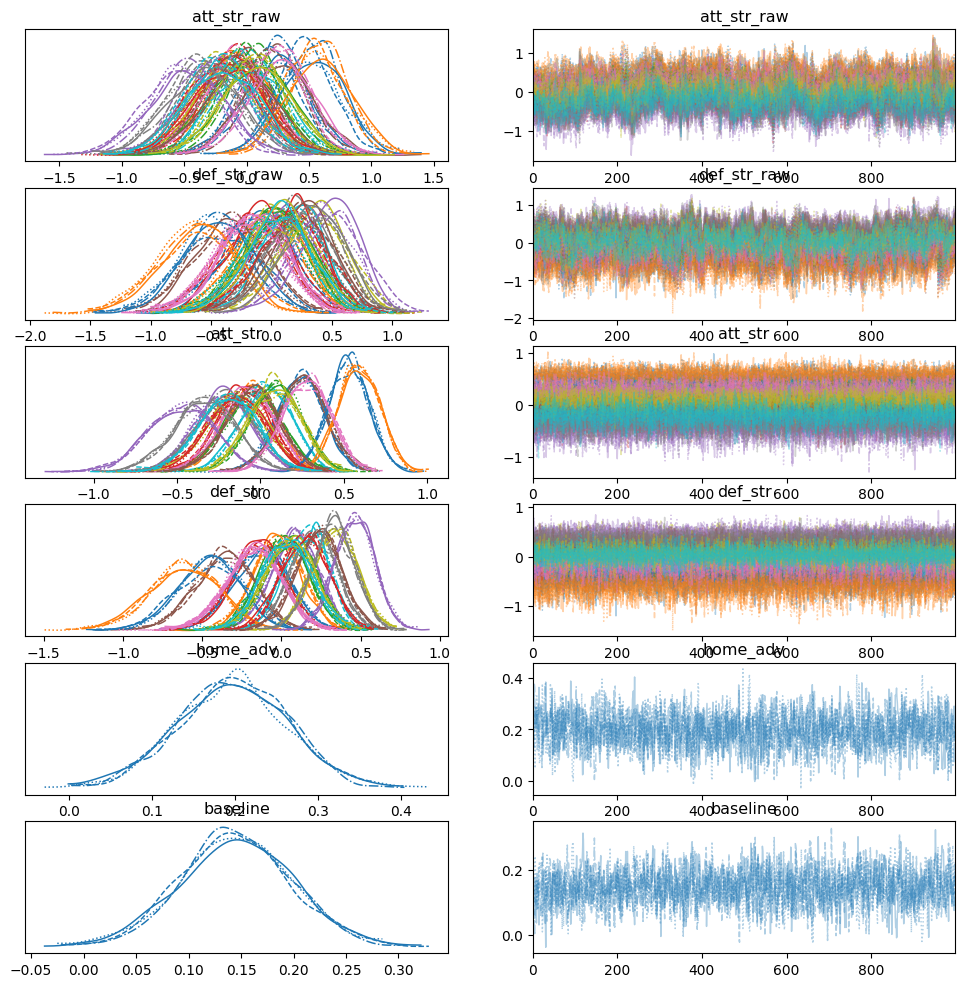

In [2]:
model, trace, results = run_full_analysis(
    train_df=df,
    teams=team_mapping,
    n_teams=n_teams,
    season=int(season[:4]),
    league=league,
    team_mapping=team_mapping,
    model_version="vanilla_priors",
    trace_samples=5000,
    tune_samples=2500,
    use_previous_season_priors=False
)

FOOTBALL MODEL ANALYSIS - PREMIER_LEAGUE 2021
Season: 2021
League: Premier_League
Teams: 20
Model version: vanilla_priors
Samples: 5000 (tune: 2500)

Building and sampling model...
  → Previous season priors disabled
  → Using default priors (no previous season data)


c:\Users\Owner\AppData\Local\Programs\Python\Python312\Lib\site-packages\pymc\data.py:274: FutureWarning: ConstantData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details



Analyzing results...
MODEL ANALYSIS RESULTS

1. PARAMETER SUMMARY STATISTICS
----------------------------------------
                 mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
att_str_raw[0]  0.217  0.265  -0.257    0.732      0.014    0.010     340.0   
att_str_raw[1] -0.080  0.275  -0.626    0.404      0.015    0.011     333.0   
att_str_raw[2] -0.059  0.276  -0.581    0.449      0.015    0.010     358.0   
att_str_raw[3] -0.118  0.275  -0.638    0.387      0.015    0.011     337.0   
att_str_raw[4] -0.251  0.280  -0.782    0.275      0.015    0.010     363.0   
...               ...    ...     ...      ...        ...      ...       ...   
def_str[15]     0.234  0.140  -0.031    0.494      0.002    0.001    7789.0   
def_str[16]    -0.177  0.183  -0.521    0.156      0.002    0.002    6404.0   
def_str[17]     0.326  0.133   0.072    0.573      0.002    0.001    6698.0   
def_str[18]     0.051  0.157  -0.236    0.353      0.002    0.002    6477.0   
def_str[19] 

c:\Users\Owner\AppData\Local\Programs\Python\Python312\Lib\site-packages\pymc\data.py:274: FutureWarning: ConstantData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details



Analyzing results...
MODEL ANALYSIS RESULTS

1. PARAMETER SUMMARY STATISTICS
----------------------------------------
                 mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
att_str_raw[0]  0.400  0.244  -0.029    0.875      0.015    0.010     271.0   
att_str_raw[1]  0.023  0.263  -0.478    0.513      0.015    0.011     303.0   
att_str_raw[2] -0.272  0.275  -0.780    0.271      0.015    0.011     324.0   
att_str_raw[3]  0.101  0.254  -0.382    0.567      0.015    0.011     290.0   
att_str_raw[4]  0.372  0.250  -0.067    0.876      0.015    0.011     263.0   
...               ...    ...     ...      ...        ...      ...       ...   
def_str[15]     0.170  0.138  -0.096    0.412      0.002    0.001    7830.0   
def_str[16]     0.235  0.138  -0.025    0.489      0.001    0.001    9084.0   
def_str[17]     0.034  0.150  -0.249    0.307      0.002    0.002    7272.0   
def_str[18]     0.012  0.148  -0.275    0.276      0.002    0.002    7869.0   
def_str[19] 

c:\Users\Owner\AppData\Local\Programs\Python\Python312\Lib\site-packages\pymc\data.py:274: FutureWarning: ConstantData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details



Analyzing results...
MODEL ANALYSIS RESULTS

1. PARAMETER SUMMARY STATISTICS
----------------------------------------
                 mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
att_str_raw[0]  0.384  0.252  -0.105    0.840      0.017    0.012     218.0   
att_str_raw[1]  0.196  0.263  -0.303    0.686      0.017    0.012     234.0   
att_str_raw[2] -0.053  0.268  -0.563    0.451      0.017    0.012     237.0   
att_str_raw[3] -0.000  0.264  -0.487    0.501      0.017    0.012     229.0   
att_str_raw[4] -0.085  0.273  -0.618    0.409      0.017    0.012     246.0   
...               ...    ...     ...      ...        ...      ...       ...   
def_str[15]    -0.040  0.153  -0.314    0.254      0.002    0.003    7967.0   
def_str[16]     0.392  0.121   0.170    0.625      0.001    0.001    8382.0   
def_str[17]     0.103  0.143  -0.152    0.383      0.002    0.002    7882.0   
def_str[18]     0.225  0.131  -0.030    0.460      0.001    0.001   10906.0   
def_str[19] 

c:\Users\Owner\AppData\Local\Programs\Python\Python312\Lib\site-packages\pymc\data.py:274: FutureWarning: ConstantData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details



Analyzing results...
MODEL ANALYSIS RESULTS

1. PARAMETER SUMMARY STATISTICS
----------------------------------------
                 mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
att_str_raw[0]  0.182  0.256  -0.276    0.688      0.016    0.012     249.0   
att_str_raw[1]  0.144  0.259  -0.327    0.638      0.016    0.011     259.0   
att_str_raw[2]  0.196  0.258  -0.297    0.658      0.016    0.012     245.0   
att_str_raw[3]  0.175  0.258  -0.309    0.652      0.016    0.012     249.0   
att_str_raw[4]  0.172  0.261  -0.289    0.695      0.017    0.012     242.0   
...               ...    ...     ...      ...        ...      ...       ...   
def_str[15]    -0.092  0.157  -0.379    0.205      0.002    0.003    6934.0   
def_str[16]     0.408  0.125   0.173    0.637      0.001    0.001    9782.0   
def_str[17]     0.269  0.132   0.033    0.534      0.001    0.001    8625.0   
def_str[18]     0.125  0.143  -0.137    0.406      0.001    0.002    9478.0   
def_str[19] 

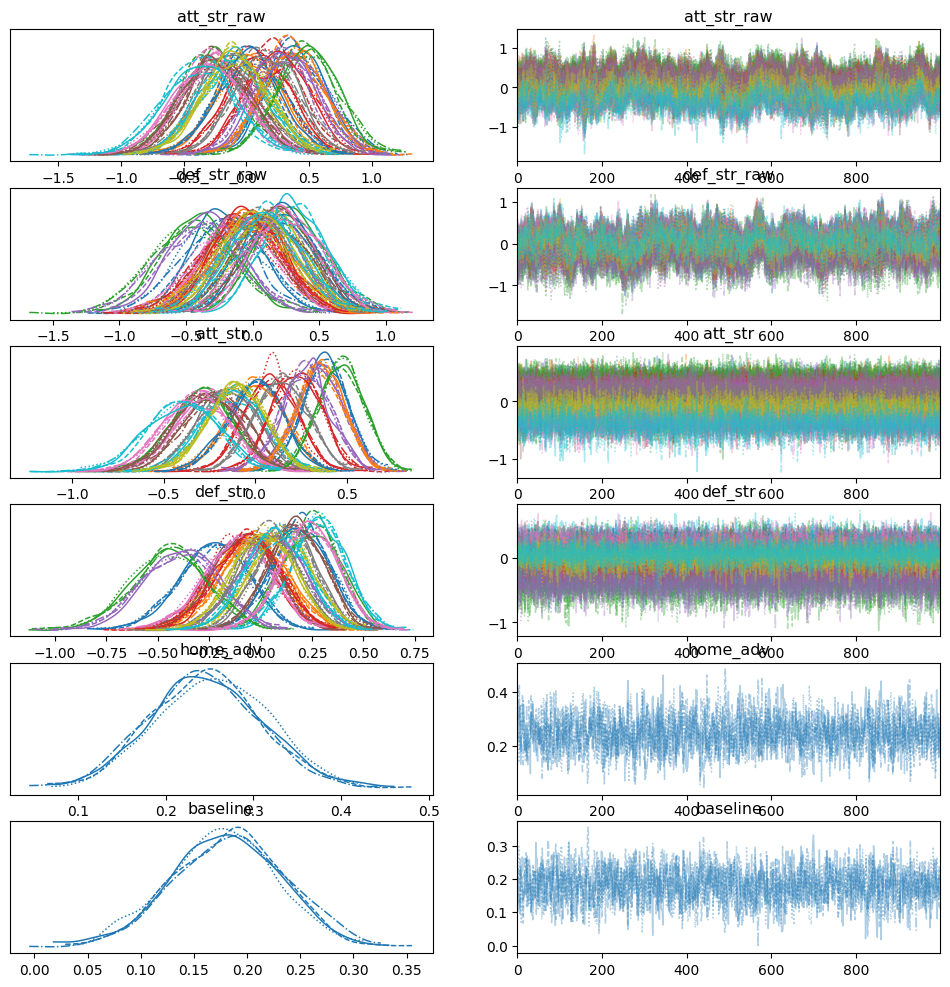

In [2]:
seasons = ['2021-2022', '2022-2023', '2023-2024', '2024-2025']

for season in seasons:
    df, team_mapping, n_teams = load_and_process_data(
        db_path=r'C:\Users\Owner\dev\algobetting\infra\data\db\fotmob.db',
        league=league, 
        season=season,
        max_goals=9,
        decay_rate=0.002,
        goals_weight=0.2,
        xg_weight=0.5,
        psxg_weight=0.3

    )

    model, trace, results = run_full_analysis(
        train_df=df,
        teams=team_mapping,
        n_teams=n_teams,
        season=int(season[:4]),
        league=league,
        team_mapping=team_mapping,
        model_version="vanilla_priors",
        trace_samples=5000,
        tune_samples=2500,
        use_previous_season_priors=False
    )